In [2]:
# Start writing code here...%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score


import numpy.polynomial.polynomial as poly

In [4]:
def get_clean_data(file):
    # Reads panadas dataframe
    df = pd.read_csv(file)
    # Convert datetime to a number
    df['SALE DATE'] = pd.to_datetime(df['SALE DATE']).astype(np.int64)
    # Drop other unneeded columns
    data = df.drop(columns = ["NEIGHBORHOOD", "APARTMENT NUMBER", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "EASE-MENT", "ADDRESS", "ZIP CODE", "BUILDING CLASS AT TIME OF SALE", "TOTAL UNITS"])
    # Drop other boroughs
    # data = data[(data['BOROUGH'] != 1) & (data['BOROUGH'] != 2) & (data['BOROUGH'] != 5)]
    data = data[(data['BOROUGH'] == 3) | (data['BOROUGH'] == 4)]
    # Convert all other strings to int values
    data = data.astype(int)
    # print(x.info())
    return data

In [5]:
def preprocess_normalize_data(df):
    df_x_prescale = df[["BLOCK","LOT","RESIDENTIAL UNITS","COMMERCIAL UNITS","LAND SQUARE FEET", "GROSS SQUARE FEET","YEAR BUILT","TAX CLASS AT TIME OF SALE","SALE PRICE", "SALE DATE"]]
    df_y = df[["BOROUGH"]]
    # print(df_x_prescale)

    x_scaled_array = preprocessing.scale(df_x_prescale)
    y_array = np.array(df_y)

    df_z_scaled = df_x_prescale.copy()
    # print(df_z_scaled)
    # apply normalization technique to Sale Date
    column = 'SALE DATE'
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()
    # print(df_z_scaled)
    
    X_train, X_test, y_train, y_test = train_test_split(x_scaled_array, y_array, test_size = 0.8, train_size = 0.2)
    return X_train, X_test, y_train, y_test

### Logistic Regression Normal

In [6]:
data = get_clean_data("cleaned_data.csv")
X_train, X_test, y_train, y_test = preprocess_normalize_data(data)

#Running Logistic Regression (without regularization)
logreg = LogisticRegression(C = 100000000) # regular logistic regression, no regularization
logreg.fit(X_train, y_train)
yhat_test = logreg.predict(X_test)
accuracy_test = np.mean(yhat_test == y_test)
#logreg.coef_, logreg.intercept_, 
accuracy_train = logreg.score(X_train, y_train)

print(accuracy_train, accuracy_test)





/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
0.7617680826636051 0.516178120924345


### Logistic Regression F1 Score

In [7]:
f1_score_logistic_regression = f1_score(y_test, yhat_test,labels=[3,4], pos_label=3, average='binary')
print("F1 Score:", f1_score_logistic_regression)


F1 Score: 0.7973416541719011


### Logistic Regression with Ridge Regularization

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

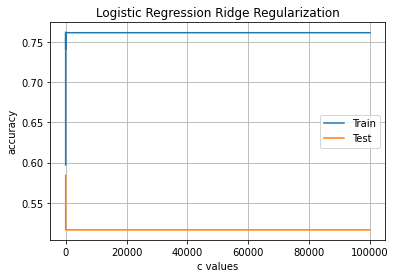

In [11]:
alpha_values = [10**i for i in range(-5,6)]
ridge_train_reg_acc = [] 
ridge_test_reg_acc = []
for alpha in alpha_values: 
    logreg = LogisticRegression(C = alpha)
    logreg.fit(X_train, y_train)
    yhat_test = logreg.predict(X_test)
    accuracy_test = np.mean(yhat_test == y_test)
    ridge_test_reg_acc.append(accuracy_test)
    #logreg.coef_, logreg.intercept_, 
    accuracy_train = logreg.score(X_train, y_train)
    ridge_train_reg_acc.append(accuracy_train)
    #print("Train accuracy, \tc = ",alpha, "\tAccuracy: ",accuracy_train)
    #print("Test accuracy, \tc = ",alpha, "\tAccuracy: ", accuracy_test)

plt.plot(alpha_values, ridge_train_reg_acc, alpha_values, ridge_test_reg_acc)
plt.grid()
plt.xlabel('c values')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc = 'center right')
plt.title('Logistic Regression Ridge Regularization')
print(alpha_values)
print(ridge_train_reg_acc, ridge_test_reg_acc)

### Logistic Regression Lasso Regularization

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

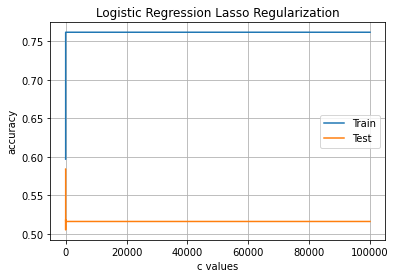

In [10]:
alpha_values = [10**i for i in range(-5,6)]
lasso_train_reg_acc = [] 
lasso_test_reg_acc = []
for alpha in alpha_values: 
    logreg = LogisticRegression(C = alpha, penalty = 'l1', solver='liblinear') # regular logistic regression, no regularization
    logreg.fit(X_train, y_train)
    yhat_test = logreg.predict(X_test)
    accuracy_test = np.mean(yhat_test == y_test)
    lasso_test_reg_acc.append(accuracy_test)
    #logreg.coef_, logreg.intercept_, 
    accuracy_train = logreg.score(X_train, y_train)
    lasso_train_reg_acc.append(accuracy_train)
    #print("Train accuracy, \tc = ",alpha, "\tAccuracy: ",accuracy_train)
    #print("Test accuracy, \tc = ",alpha, "\tAccuracy: ", accuracy_test)

plt.plot(alpha_values, lasso_train_reg_acc, alpha_values, lasso_test_reg_acc)
plt.grid()
plt.xlabel('c values')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc = 'center right')
plt.title('Logistic Regression Lasso Regularization')
print(alpha_values)
print(lasso_train_reg_acc, ridge_test_reg_acc)

### Logistic Regression Polynomial Transformation

In [ ]:
data = get_clean_data("cleaned_data.csv")
X_train, X_test, y_train, y_test = preprocess_normalize_data(data)

poly_features = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:

logreg = LogisticRegression(C = 100000000) # regular logistic regression, no regularization
logreg.fit(X_poly_train, y_train)
yhat_test = logreg.predict(X_poly_test)
accuracy_test = np.mean(yhat_test == y_test)
#logreg.coef_, logreg.intercept_, 
accuracy_train = logreg.score(X_poly_train, y_train)

print(accuracy_train, accuracy_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
0.8109452736318408 0.5205263127843248


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=47c5d483-7427-4b12-afc5-c21a2f7e3d4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>